# Direct-Drive PM Generator Design
### This project aims to design a direct-drive permanent magnet generator for a wind turbine wıth the below specifications:
#### Rated Power: 50 kW
#### Rated Speed: 60 rpm
#### Surface mounted, radial flux type PM generator
#### Outer Diameter < 1.5 m
#### Total Mass < 1000 kg

##### RFPM generator is designed to deliver desired power in a constant speed. Based on relation between torque, power and speed, for the constant values of output power and shaft speed, torque is constant, too. Similar to the design of other electrical machines, design process of RFPM generator is also started from its torque equation. Thus, the first step is the design of this machine is derivation of torque equation in the terms of its dimensions and parameters. Derivation of torque equation for this motor is given in the reference. It is worth to mention that, only the fundamental component of voltages and currents are considered, and they are taken as pure sinusoidal waveform in this derivation. 

In [50]:
Pout=50e3
n=60
import math
from math import pi
wm=n*2*pi/60
Tem=Pout/wm
Vph=220
Ia=Pout/(3*Vph)
m=3
print(Ia)

75.75757575757575


In [6]:
Bavg=0.55 #Airgap average flux density 
q=22000 #Chosen magnetic loading
Dout=1.5 #Outer diameter(m)
Di=Dout*0.8 #In a direct drive generator because of high number of poles the stator back core is small so we assume stator back core is 0.1 of outer diameter.
Kw=1 #number of slot per pole per phase is chosen 1 to have higher number of poles.
from math import sqrt
Lstk=(Tem*4*sqrt(2))/((pi**2)*Bavg*q*Kw*(Di**(2))) #axial length of generator
print('Stack length =',Lstk,'m')

Stack length = 0.2617685801352938 m


In [7]:
Tw=0.01 #Tooth width(m) is selected regarding to mechanical limits, the tooth with to slot width is 1/2 
Qs=(pi*Di)/(2*Tw) #Number of slots 
print('Qs=',Qs)

Qs= 188.4955592153876


In [8]:
Qs=186 #Chosen slot numbers
p=Qs/m #Number of poles
Pp=p/2
print('Number of poles =',p)

Number of poles = 62.0


In [13]:
from math import sin
magnet_span=2*pi/3 #Magnet span has been assigned 0.67 to eliminate harmonics in the flux wave form
B_peak=(pi/2)*Bavg #Peak value of airgap flux density if the magnet span was 180 degrees(T)
Bg=(pi/4)*B_peak*(1/(sin(pi/3))) #Peak flux density for rectangular wave form with 120 degrees width(T)
print('Bg=',Bg,'T')
g=0.0015 #Airgap(m) is selected regarding the mechanical limits
Ag=(((2*pi)/3)*((Di/2)-(g/2))+(2*g))*(Lstk+(2*g)) #Airgap area with fringing effect
Am=((2*pi)/3)*((Di/2)-g)*Lstk #Magnet area with 120 degrees arc
Bm=Bg*Ag/Am #magnet flux density(T)
print('Bm=',Bm,'T')

Bg= 0.783505079192558 T
Bm= 0.7953741898735582 T


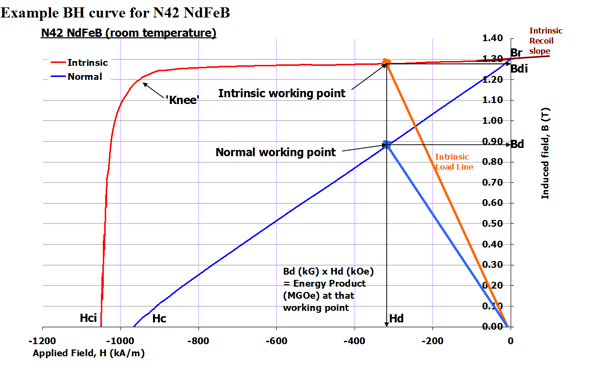

In [16]:
from IPython.display import Image
Image(filename='Images/bh.png', width=700, height=700)

In [30]:
Hm=223000 #Selected from the B-H curve (A/m)
Lm=(Bm*Am*g)/(1.256*1e-6*Ag*Hm) #From Hm*Lm+Hg*Lg=0 with infinite permeable core assumption.
print('Magnet thickness=',Lm,'m')

Magnet thickness= 0.004196029886281588 m


In [31]:
Tp=(pi*Di)/p #Pole pitch
Φp=Bavg*Tp*Lstk #flux per pole
f=n*p/120 #Frequency
Nph=Vph/(4.44*Kw*f*Φp) #Turns per phase for stator side
Ns=Nph/(Pp) #Turns per slot
print('Nph=',Nph,'turns')
print('Ns=',Ns,'turns')

Nph= 182.58217689866038 turns
Ns= 5.88974764189227 turns


In [39]:
Nph=186
Ns=Nph/(Pp) #Turns per slot
print('Nph=',Nph,'turns')
print('Ns=',Ns,'turns')

Nph= 186 turns
Ns= 6.0 turns


In [40]:
Iph=Pout/(Vph*3) #Phase current
print('Iph =',Iph,'A')

Iph = 75.75757575757575 A


In [42]:
Jcos=3e6 #current density(A/m2)
Aco=Iph/Jcos #required wire cross section (m2)
dco=sqrt(4*Aco/(pi)) #wire gauge diameter (m) 
print('Wire cross section =',Aco, 'm2')
print('Wire gauge diameter',dco, 'm')

Wire cross section = 2.525252525252525e-05 m2
Wire gauge diameter 0.005670318664408416 m


In [43]:
dco=5.827e-3 #wire diameter is selected from AWG standards(AWG3)
Aco=26.7e-6
Kf=0.4#Fill factor
Asu=(Aco*Ns)/(Kf)
print ('Required area of slot =',Asu,'m2')

Required area of slot = 0.0004005 m2


### Stator Dimensions¶
 

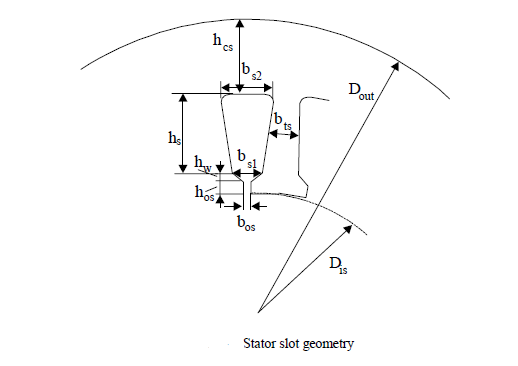

In [79]:
#Slot shape is chosen as figure below
from IPython.display import Image
Image(filename='Images/stator.png', width=700, height=700)

In [44]:
b_ts=Tw
h_os=0.001
h_w=0.001
b_s1=Tw
b_s2=b_s1 
h_s=((2*(Asu))/(b_s1+b_s2))
b_os=3*1e-3
print('b_ts =',b_ts,'m')
print('b_s1 =',b_s1,'m')
print('h_os =',h_os,'m')
print('b_os =',b_os,'m')
print('h_w =',h_w,'m')
print('b_s2 =',b_s2,'m')
print('h_s =',h_s,'m')

b_ts = 0.01 m
b_s1 = 0.01 m
h_os = 0.001 m
b_os = 0.003 m
h_w = 0.001 m
b_s2 = 0.01 m
h_s = 0.040049999999999995 m


In [48]:
B_bc=1.4 #Back core flux density
h_bc=Φp/(2*Lstk*B_bc) #Back core width 
print('h_bc =',h_bc,'m')

h_bc = 0.011943843037841382 m


In [46]:
Dout=Di+2*(h_s+h_os+h_w+h_bc) #Outer diameter of generater (limited in 1.5m)
print('Dout =',Dout,'m')

Dout = 1.307987686075683 m


In [57]:
Dir=Di-(2*(g+Lm+h_bc)) #Inner diameter of rotor
print(Dir)

1.1647202541517543


### Resistances and Inductances 

In [154]:
Lend=pi*Di/p #End winding
Lcupper=(2*(Lstk+Lend))*Ns*Pp #Total cupper length
ρc_20=1.78*1e-8 #Copper rsistivity at 20 degrees
ρc_60=ρc_20*(1+(1/273)*(60-20)) #We assume that generator will work at 60 degrees temperature 
Rs=ρc_60*(Lcupper)/(Aco)
print('Stator resistance=',Rs,'Ω')

Stator resistance= 0.09171960830467163 Ω


In [120]:
A_pole=pi*(Di-g)*Lstk/p #pole area
u0=1.256*1e-6 #permeability of air
ur=1.099 #relative permeability
Rg=g/(u0*A_pole) #airgap reluctance
Rm=Lm/(u0*ur*A_pole) #magnet reluctance
Lph=(p/2)*(Ns**2)/(2*(Rg+Rm))
Xs=2*pi*f*Lph
print('Lph=',Lph,'H')
print('phase inductance=',Xs,'Ω')

Lph= 0.002095008000975811 H
phase inductance= 0.40806302819480167 Ω


### Efficiency

In [98]:
P_cu=3*R1*(Iph**2) #Stator winding loss
print('Stator winding loss=',P_cu,'w')

Stator winding loss= 1579.1943578628034 w


In [128]:
P_mechloss=400 #Mechanical losses,friction..(w)

In [129]:
#core losses coefficients
kh=0.0383
ke=5.8e-5
nn=2
so=0.5
Qs_p_ph=1
J=3e6
Kcu=0.4
iron_density=7800

In [115]:
pc_tooth=kh*f*(B_bc**nn)+ke*(f**2)*(B_bc**2)   #tooth core losses
pc_backcore=kh*f*(B_bc**nn)+ke*(f**2)*(B_bc**2)  #back core core losses
Mt=iron_density*Lstk*Qs*Tw*(h_s+h_w+h_os)    #tooth mass
Mbc=iron_density*Lstk*(0.25*pi*(Dout**2-(Di+2*h_s+2*h_w+2*h_os)**2))  #back core mass
P_core=Mt*pc_tooth+Mbc*pc_backcore     #total core losses
print('Core loss=',P_core,'w')

Core loss= 630.9903238807412 w


In [130]:
P_loss=P_cos+P_core+P_mechloss
print(P_loss)

2610.1846817435444


In [131]:
η=100*Pout/(Pout+P_loss)
print('Efficiency =',η,'%')

Efficiency = 95.03863235315858 %


In [157]:
pf=Vph/sqrt(Vph**2+(Xs*Ia)**2)
print('Power factor=',pf) #Power factor is to high, it is because we assumed core is infenetely permeable so the hole produved MMF on magnet is on airgap and the MMF of stator and rotor cores would be negligable. Therefore the magnetizing current will be to small and power factor becomes high.

Power factor= 0.9902712433700298


### Total mass

In [152]:
Stator_mass=Mt+Mbc #Total stator mass
cu_density=8960
iron_density=7870
magnet_density=7550
Cupper_mass=3*cu_density*Lcupper*Aco
Magnet_mass=magnet_density*Lstk*0.67*pi*0.25*((Di-2*g)**2-(Di-2*g-2*Lm)**2)
Rotor_mass=iron_density*Lstk*(0.25*pi*((Di-2*(g+Lm))**2-(Di-2*(g+Lm+h_bc))**2))
Total_mass=Stator_mass+Cupper_mass+Magnet_mass+Rotor_mass
print('Total_mass=',Total_mass,'Kg')

Total_mass= 456.8894895320224 Kg


### Simualation results

### RMxprt

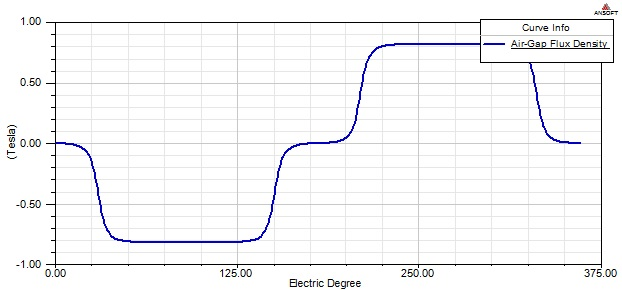

In [124]:
from IPython.display import Image
Image(filename='Images/Bg.jpg', width=700, height=700)

#### Form RMxprt results airgap flux density of the square waveform becomes 0.8 tesla wich has been estimated 0.78 as Bg in our design process. It results in 0.55 tesla average airgap flux.

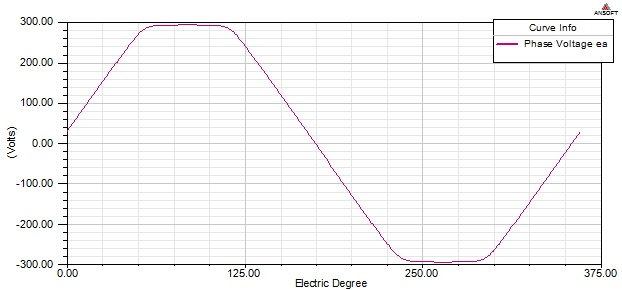

In [158]:
from IPython.display import Image
Image(filename='Images/Ea.jpg', width=700, height=700)

#### Induced voltage which is the derivetive of flux is shown in the figure. Our terminal voltage is 311volts amplitude. So by taking cupper losses and leakage inductane the induced voltage is around 300volts. The accurate value of induced voltage can be calculated from the equivalent circuit of the machine in further studies.

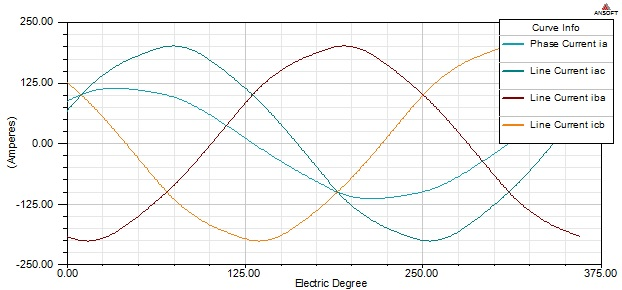

In [126]:
from IPython.display import Image
Image(filename='Images/Output.jpg', width=700, height=700)

#### Terminal voltage and currents of generator.

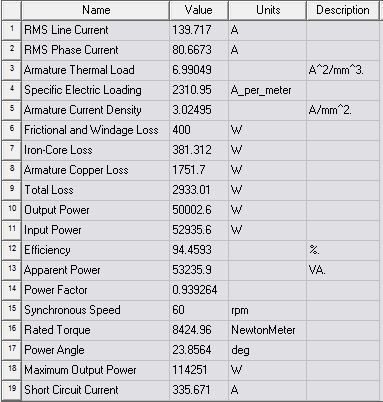

In [137]:
from IPython.display import Image
Image(filename='Images/fuulload.jpg', width=700, height=700)

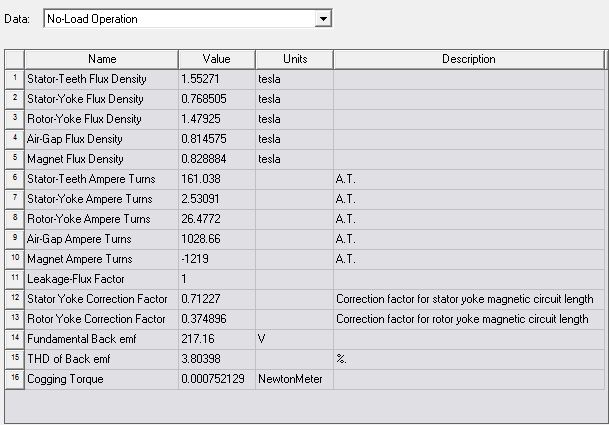

In [159]:
from IPython.display import Image
Image(filename='Images/Noload.jpg', width=700, height=700)

#### Final results of RMxprt shows that our current is 80 A, whıch has been calculated 75 A.
#### Total loss is 3000w compared with the 2600w loss calculated in the calculations.
#### Efficiency is also same 95% on both results and calculations.
#### Power factor becomes 94%. It is a bit higher than calculated value because there is an unexpected saturation on stator teeth. Stator MMF is 160 ampere turns in the RMxprt results. It results a higher magnetizing current and reduces the power factor.
#### Apparent power 53Kw is the sum of output power and losses.

### Magnetostatic

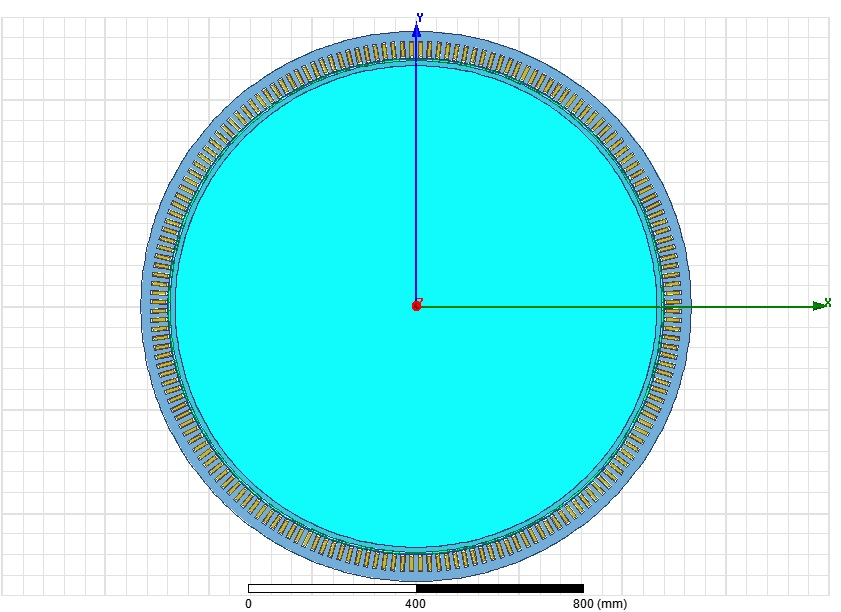

In [133]:
from IPython.display import Image
Image(filename='Images/2Dmodel.jpg', width=700, height=700)

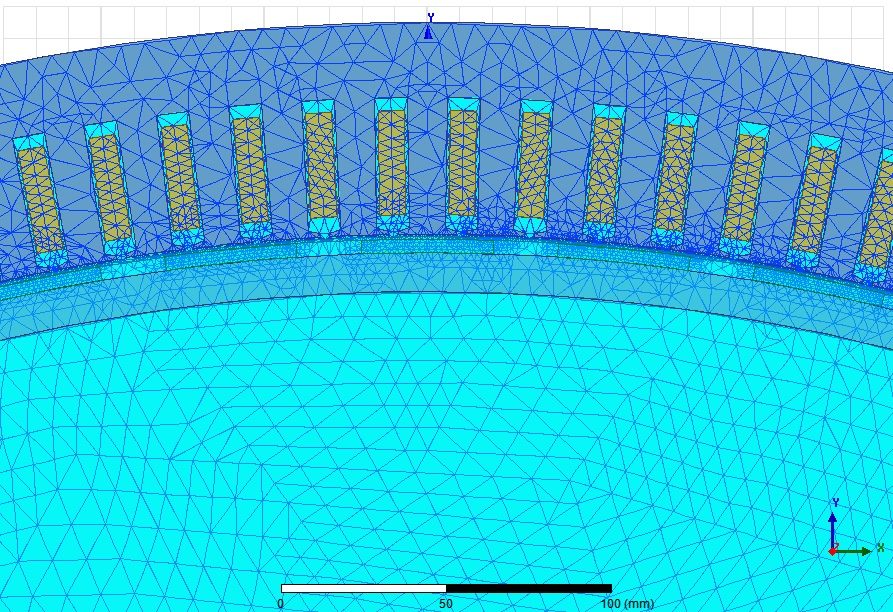

In [134]:
from IPython.display import Image
Image(filename='Images/mesh.jpg', width=700, height=700)

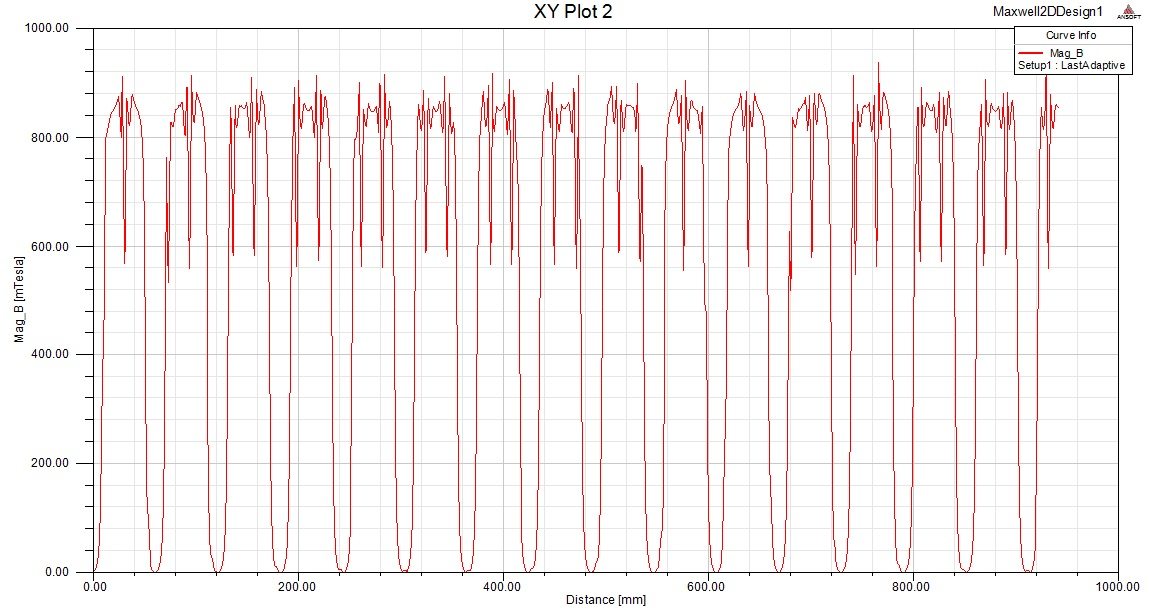

In [135]:
from IPython.display import Image
Image(filename='Images/Bairgap2D.jpg', width=700, height=700)

#### The airgap flux density is same with the RMxprt results. It has a peak value of 0.8.

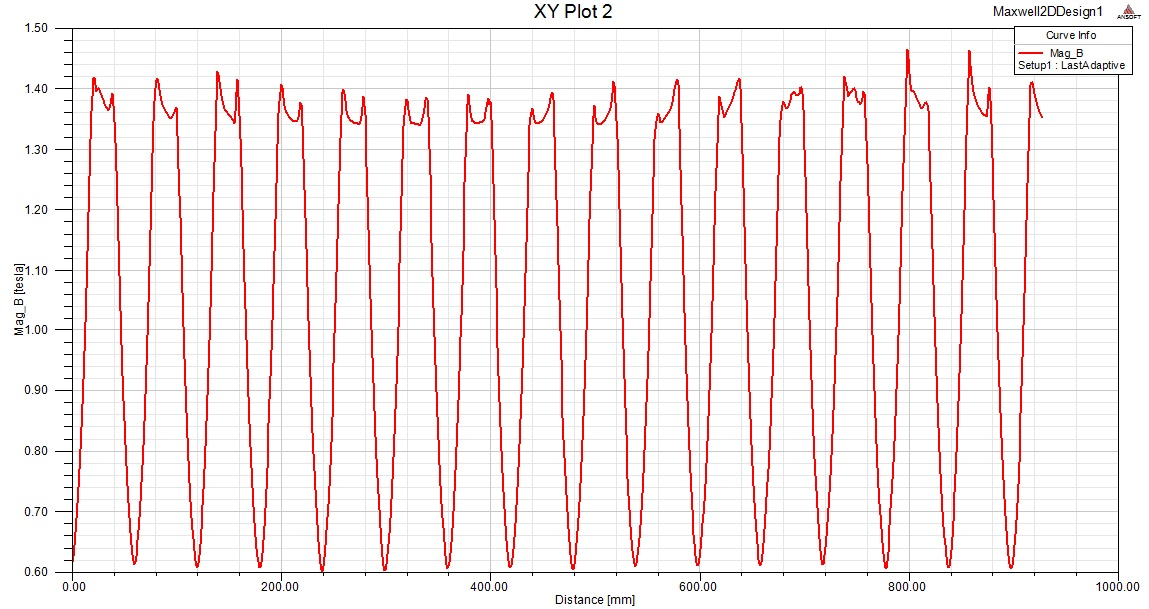

In [136]:
from IPython.display import Image
Image(filename='Images/rotorflux.jpg', width=700, height=700)

#### The flux density of rotor core has been graphed here. We have estimated a value of 1.4 for the maxmimum flux demsity in the cores, and it matches. 

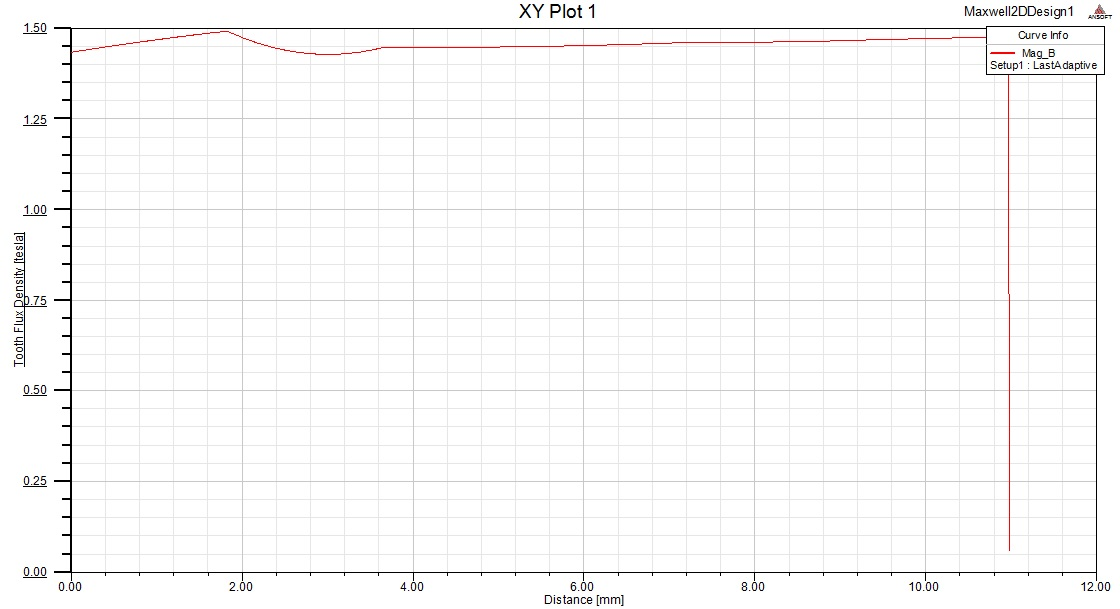

In [160]:
from IPython.display import Image
Image(filename='Images/tooth.jpg', width=700, height=700)

### Comments

##### Due to magnetic property of core material and nonlinear B-H curve, flux density in back-core and teeth should be restricted. Based on sizing equations of RFPM generator, both rotor and stator back-core lengths is designed in manner that back-core flux density is set to Bbc (or knee point of B-H curve). However, Tooth flux density is not controlled automatically during design process, therefore, a constraint should be exerted on tooth flux density to keep it flux density under the saturation point of core material. 
##### In addition to air gap length (g), electrical loading (q) and current density (J) are assumed independent variables. In spite of air gap length (g), larger values of q and J result in smaller and lighter generator, so, it is intended to assign larger values to them from electrical point of view. However, values of these two parameters are limited by generator temperature rise. Larger q and J increases designed generator operating temperature. In order to include them into independent variables, it is necessary to insert thermal analysis in optimization process, but it is a quiet complicated task and makes the optimization process time-consuming. The alternative way is to exclude q and J from independent variables and choose them as parameter. Then, their values are assigned based on generator cooling type using scientific literature.